<a href="https://colab.research.google.com/github/shubham10693/Technocolabs/blob/main/Toxic_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords          
from google.colab import files
from nltk.stem import WordNetLemmatizer   
from nltk.corpus import stopwords        

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Toxic _comment/

/content/drive/My Drive/Toxic _comment


In [4]:
train =pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

In [107]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0


In [43]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [34]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [35]:
train.shape

(159571, 8)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [37]:
test.shape

(153164, 2)

In [39]:
nltk.download('stopwords')
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [40]:
length = train['comment_text'].str.len()

print("Max length of a string is {}".format(length.max()))
print("Mean length of a string is {}".format(length.mean()))
print("Minimum length of a string is {}".format(length.min()))

Max length of a string is 5000
Mean length of a string is 394.0732213246768
Minimum length of a string is 6


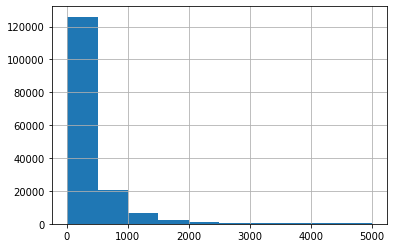

In [41]:
length.hist()

In [42]:
#Check for any null comments in the dataset
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
train['comment_text'] = train['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
train['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [8]:
df_toxic = train.loc[:,['id','comment_text','toxic']]

df_toxic['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [9]:
df_sev_tox = train.loc[:,['id','comment_text','severe_toxic']]
df_obscene = train.loc[:,['id','comment_text','obscene']]
df_threat = train.loc[:,['id','comment_text','threat']]
df_insult = train.loc[:,['id','comment_text','insult']]
df_id_hate = train.loc[:,['id','comment_text','identity_hate']]

In [13]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [11]:
def vec_tf(df_1,label,vectorizer,ngram):

    X = df_1.comment_text
    y = df_1[label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    vec = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec  = vec.transform(X_test)     

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_vec, y_train)
    print('RandomForestClassifier done')

    lr = LogisticRegression()
    lr.fit(X_train_vec, y_train)
    print('LogisticRegression done')

    mnb = MultinomialNB()
    mnb.fit(X_train_vec, y_train)
    print('MultinomialNB done')
    
    f1_score_data = {'F1 Score':[f1_score(randomforest.predict(X_test_vec), y_test),
                                f1_score(lr.predict(X_test_vec), y_test), 
                                f1_score(mnb.predict(X_test_vec), y_test)
                                ]} 
                          
    df_f1 = pd.DataFrame(f1_score_data, index=['Random Forest','Log Regression','MultinomialNB'])  

    return df_f1

    

In [12]:
df_tox_vec = vec_tf(df_toxic, 'toxic', TfidfVectorizer, (1,1))
df_tox_vec.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)
df_tox_vec

RandomForestClassifier done


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression done
MultinomialNB done


,F1 Score(toxic)
Random Forest,0.726590
Log Regression,0.712742
MultinomialNB,0.332365


In [14]:
df_sev_vec = vec_tf(df_sev_tox, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_vec.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

RandomForestClassifier done
LogisticRegression done
MultinomialNB done


In [15]:
df_sev_vec

,F1 Score(severe_toxic)
Random Forest,0.110701
Log Regression,0.345821
MultinomialNB,0.000000


In [16]:
df_obscene_vec = vec_tf(df_obscene, 'obscene', TfidfVectorizer, (1,1))
df_obscene_vec.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
df_obscene_vec

RandomForestClassifier done
LogisticRegression done
MultinomialNB done


,F1 Score(obscene)
Random Forest,0.772008
Log Regression,0.731096
MultinomialNB,0.226454


In [17]:
df_threat_vec = vec_tf(df_threat, 'threat', TfidfVectorizer, (1,1))
df_threat_vec.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
df_threat_vec

RandomForestClassifier done
LogisticRegression done
MultinomialNB done


,F1 Score(threat)
Random Forest,0.093333
Log Regression,0.243902
MultinomialNB,0.000000


In [18]:
df_insult_vec = vec_tf(df_insult, 'insult', TfidfVectorizer, (1,1))
df_insult_vec.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
df_insult_vec

RandomForestClassifier done
LogisticRegression done
MultinomialNB done


,F1 Score(insult)
Random Forest,0.611740
Log Regression,0.612759
MultinomialNB,0.096979


In [19]:
df_ide_hate_vec = vec_tf(df_id_hate, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_hate_vec.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
df_ide_hate_vec

RandomForestClassifier done
LogisticRegression done
MultinomialNB done


,F1 Score(insult)
Random Forest,0.115139
Log Regression,0.261860
MultinomialNB,0.000000


In [20]:
f1_complete = pd.concat([df_tox_vec, df_sev_vec, df_obscene_vec, df_threat_vec, df_insult_vec, df_ide_hate_vec], axis=1)
f1_complete.transpose()

,Random Forest,Log Regression,MultinomialNB
F1 Score(toxic),0.726590,0.712742,0.332365
F1 Score(severe_toxic),0.110701,0.345821,0.000000
F1 Score(obscene),0.772008,0.731096,0.226454
F1 Score(threat),0.093333,0.243902,0.000000
F1 Score(insult),0.611740,0.612759,0.096979
F1 Score(insult),0.115139,0.261860,0.000000


From above we can conclude that Logistic Regression is somewhat better thanRandom forest and much better than MultinomialNB. Therefore, we will test our model using Logistic Regression.

In [21]:
X = df_toxic.comment_text
y = df_toxic['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfidf.fit_transform(X_train)  
X_test_fit = tfidf.transform(X_test) 

lr = LogisticRegression()

lr.fit(X_train_fit, y_train)
lr.predict(X_test_fit)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 0, 0])

In [22]:
# Sample Prediction
comment1 = ['Hey You son of a Bitch, get off my back dickhead']
comment2 = ['Good morning, nice to meet you']

comment1_tfidf = tfidf.transform(comment1)
lr.predict_proba(comment1_tfidf)[:,1]

array([0.99424748])

In [23]:
comment2_tfidf = tfidf.transform(comment2)
lr.predict_proba(comment2_tfidf)[:,1]

array([0.09099361])

As we can see, the model has classified the first comment to be highly toxic with a probability of 0.99 and the second as a low toxic sentence with just 0.09 probability

In [30]:
import pickle
def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]
    
    # Initiate a Tfidf vectorizer
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    # Convert the X data into a document term matrix dataframe
    X_vect = tfv.fit_transform(X)  
    
    # saves the column labels (ie. the vocabulary)
    # wb means Writing to the file in Binary mode, written in byte objects
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
    
    lr = LogisticRegression()
    lr.fit(X_vect, y)

    # Create a new pickle file based on random forest
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(lr, f)

In [32]:
df_toxic.head()

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0


In [31]:
datalist = [df_toxic, df_sev_tox, df_obscene, df_threat, df_insult, df_id_hate]
label = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for i,j in zip(datalist,label):
    pickle_model(i, j)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
